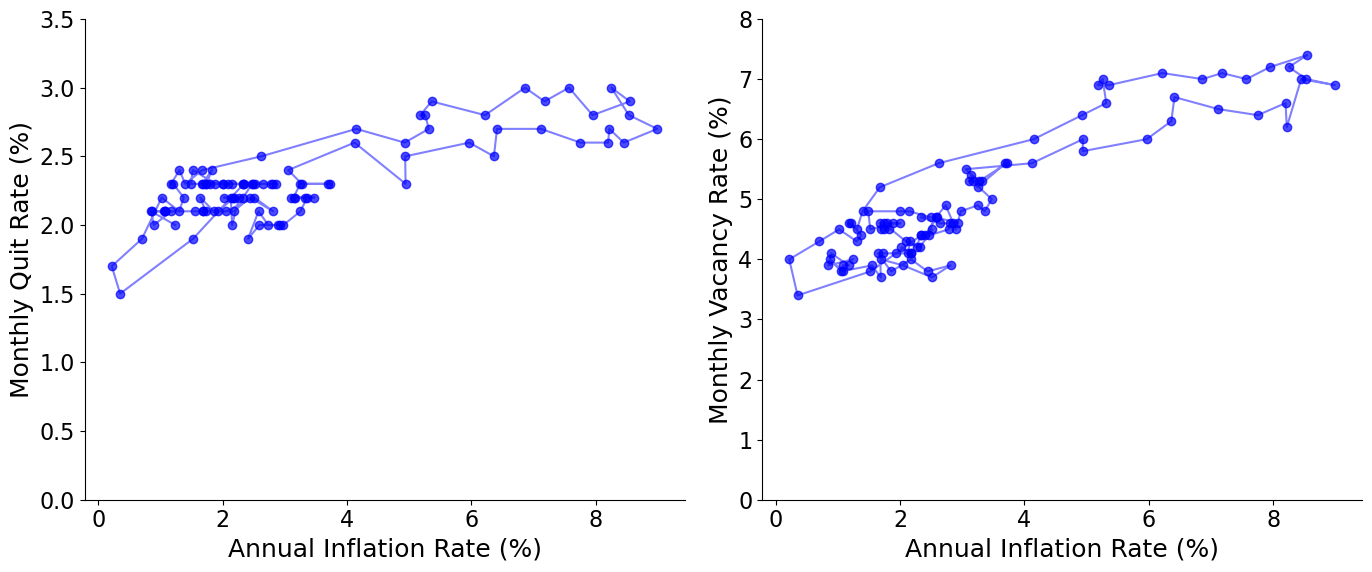

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"
df = pd.read_csv(f"{data_dir}/JOLTS/jolts_rates_v2.csv")


df = df.rename(columns={
                            'observation_date': 'date', 
                            'JTSLDR':               'layoff_rate_jolts', 
                            'JTSQUR': 'quit_rate_jolts', 
                            'JTSJOR': 'vacancy_rate_jolts', 
})

df['date'] = pd.to_datetime(df['date']) 

cpi = pd.read_csv(f"{data_dir}/CPI/CPIAUCSL.csv")

# CPI-U 
cpi = cpi.iloc[10:].reset_index(drop=True)

cpi = cpi.rename(columns={
                            'observation_date': 'date', 
                            'CPIAUCSL':               'P'
})

cpi['date'] = pd.to_datetime(cpi['date'])
cpi['P'] = pd.to_numeric(cpi['P'], errors='coerce')
cpi['P_12m_change'] = cpi['P'].pct_change(periods=12) * 100


data = df.merge(cpi, on = ['date'])

data = data[data['date'] >= '2016-01-01']

df = pd.DataFrame(data)

# Ensure 'date' is a datetime column and sort the data by date:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)

# Set a global font size if desired (optional)
plt.rcParams.update({'font.size': 16})

# Create the figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Define a function to remove top and right spines and update tick parameters
def style_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=16)

# Panel A: Quit Rate vs. Inflation
axes[0].scatter(
    df['P_12m_change'],     # x-axis: Year-over-Year CPI inflation rate
    df['quit_rate_jolts'],  # y-axis: monthly quit rate
    color='blue', alpha=0.7, label='Data points'
)
axes[0].plot(
    df['P_12m_change'],
    df['quit_rate_jolts'],
    color='blue', alpha=0.5, label='Time path'
)
axes[0].set_xlabel('Annual Inflation Rate (%)', fontsize=18)
axes[0].set_ylabel('Monthly Quit Rate (%)', fontsize=18)
axes[0].set_ylim(0, 3.5)
style_axis(axes[0])

# Panel B: Vacancy Rate vs. Inflation
axes[1].scatter(
    df['P_12m_change'],       # x-axis: Year-over-Year CPI inflation rate
    df['vacancy_rate_jolts'], # y-axis: monthly vacancy rate
    color='blue', alpha=0.7, label='Data points'
)
axes[1].plot(
    df['P_12m_change'],
    df['vacancy_rate_jolts'],
    color='blue', alpha=0.5, label='Time path'
)
axes[1].set_xlabel('Annual Inflation Rate (%)', fontsize=18)
axes[1].set_ylabel('Monthly Vacancy Rate (%)', fontsize=18)
axes[1].set_ylim(0, 8)
style_axis(axes[1])

# Adjust layout and display the figure
plt.tight_layout()
plt.savefig(f"{output_dir}/figures/inflation_labor_flows.pdf")

plt.show()




In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set directories
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"
figures_dir = f"{output_dir}/figures"
os.makedirs(figures_dir, exist_ok=True)

# Load and clean JOLTS data
df = pd.read_csv(f"{data_dir}/JOLTS/jolts_rates_v2.csv")
df.rename(columns={
    'observation_date': 'date',
    'JTSLDR': 'layoff_rate_jolts',
    'JTSQUR': 'quit_rate_jolts',
    'JTSJOR': 'vacancy_rate_jolts',
}, inplace=True)
df['date'] = pd.to_datetime(df['date'])

# Load and clean CPI data
cpi = pd.read_csv(f"{data_dir}/CPI/CPIAUCSL.csv").iloc[10:].reset_index(drop=True)
cpi.rename(columns={'observation_date': 'date', 'CPIAUCSL': 'P'}, inplace=True)
cpi['date'] = pd.to_datetime(cpi['date'])
cpi['P'] = pd.to_numeric(cpi['P'], errors='coerce')
cpi['P_12m_change'] = cpi['P'].pct_change(periods=12) * 100

# Merge datasets and restrict to post-2016
df = df.merge(cpi, on='date')
df = df[df['date'] >= '2016-01-01']
df.sort_values('date', inplace=True)

# Plot settings
plt.rcParams.update({'font.size': 16})

# Panel A: Quit Rate vs. Inflation
plt.figure(figsize=(7, 5))
plt.scatter(df['P_12m_change'], df['quit_rate_jolts'], color='blue', alpha=0.7)
plt.plot(df['P_12m_change'], df['quit_rate_jolts'], color='blue', alpha=0.5)
plt.xlabel('Annual Inflation Rate (%)', fontsize=18)
plt.ylabel('Monthly Quit Rate (%)', fontsize=18)
plt.ylim(0, 3.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(f"{figures_dir}/quit_rate_vs_inflation.pdf")
plt.close()

# Panel B: Vacancy Rate vs. Inflation
plt.figure(figsize=(7, 5))
plt.scatter(df['P_12m_change'], df['vacancy_rate_jolts'], color='blue', alpha=0.7)
plt.plot(df['P_12m_change'], df['vacancy_rate_jolts'], color='blue', alpha=0.5)
plt.xlabel('Annual Inflation Rate (%)', fontsize=18)
plt.ylabel('Monthly Vacancy Rate (%)', fontsize=18)
plt.ylim(0, 8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(f"{figures_dir}/vacancy_rate_vs_inflation.pdf")
plt.close()


In [6]:
df

,date,layoff_rate_jolts,quit_rate_jolts,vacancy_rate_jolts,P,P_12m_change
181,2016-01-01,1.3,2.0,4.0,237.652,1.237503
182,2016-02-01,1.3,2.1,3.9,237.336,0.847278
183,2016-03-01,1.3,2.0,4.1,238.080,0.891616
184,2016-04-01,1.2,2.1,3.9,238.992,1.172626
185,2016-05-01,1.3,2.1,3.9,239.557,1.078476
...,...,...,...,...,...,...
284,2024-08-01,1.0,2.0,4.7,314.121,2.591227
285,2024-09-01,1.1,1.9,4.4,314.686,2.407513
286,2024-10-01,1.1,2.1,4.7,315.454,2.576326
287,2024-11-01,1.1,2.0,4.9,316.441,2.732579


In [9]:
import statsmodels.api as sm

# Drop missing values just in case
df_reg = df[['P_12m_change', 'quit_rate_jolts', 'vacancy_rate_jolts']].dropna()

# 1. Quit rate on inflation
X_quit = sm.add_constant(df_reg['P_12m_change'])
y_quit = df_reg['quit_rate_jolts']
model_quit = sm.OLS(y_quit, X_quit).fit()

# 2. Vacancy rate on inflation
X_vac = sm.add_constant(df_reg['P_12m_change'])
y_vac = df_reg['vacancy_rate_jolts']
model_vac = sm.OLS(y_vac, X_vac).fit()

# Print summaries
print("Regression: Quit Rate ~ Inflation")
print(model_quit.summary())

print("\nRegression: Vacancy Rate ~ Inflation")
print(model_vac.summary())


Regression: Quit Rate ~ Inflation
                            OLS Regression Results                            
Dep. Variable:        quit_rate_jolts   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     208.9
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           8.20e-27
Time:                        18:38:42   Log-Likelihood:                 42.556
No. Observations:                 108   AIC:                            -81.11
Df Residuals:                     106   BIC:                            -75.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

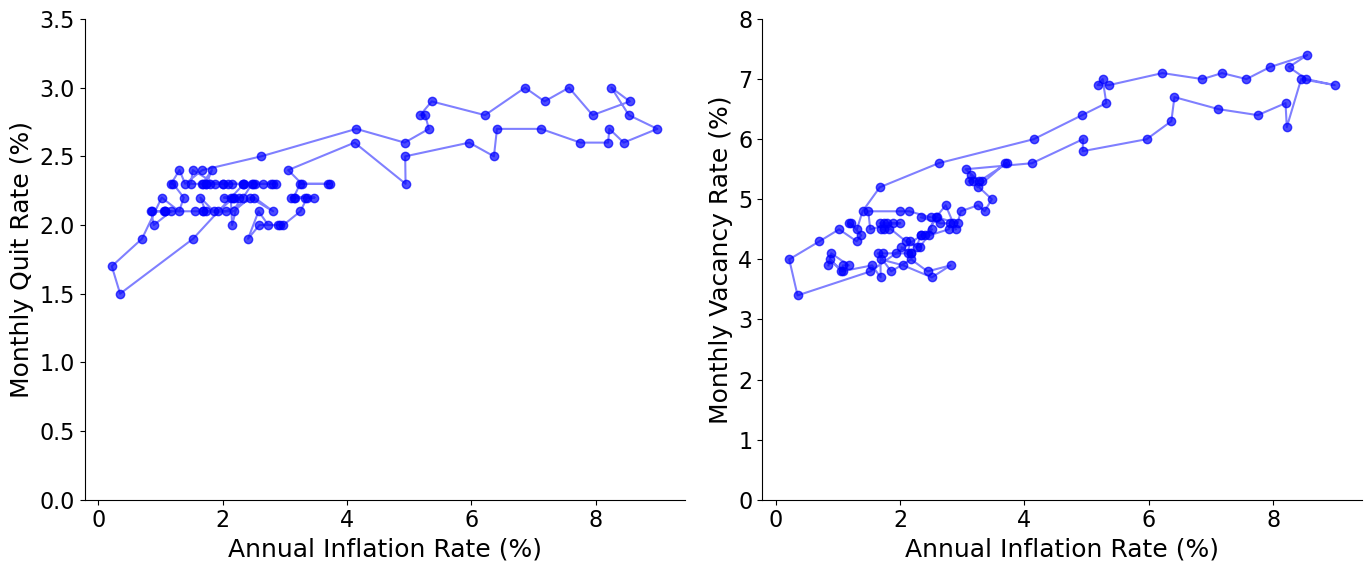

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Ensure 'date' is a datetime column and sort the data by date:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)

# Set a global font size if desired (optional)
plt.rcParams.update({'font.size': 16})

# Create the figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Define a function to remove top and right spines and update tick parameters
def style_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=16)

# Panel A: Quit Rate vs. Inflation
axes[0].scatter(
    df['P_12m_change'],     # x-axis: Year-over-Year CPI inflation rate
    df['quit_rate_jolts'],  # y-axis: monthly quit rate
    color='blue', alpha=0.7, label='Data points'
)
axes[0].plot(
    df['P_12m_change'],
    df['quit_rate_jolts'],
    color='blue', alpha=0.5, label='Time path'
)
axes[0].set_xlabel('Annual Inflation Rate (%)', fontsize=18)
axes[0].set_ylabel('Monthly Quit Rate (%)', fontsize=18)
axes[0].set_ylim(0, 3.5)
style_axis(axes[0])

# Panel B: Vacancy Rate vs. Inflation
axes[1].scatter(
    df['P_12m_change'],       # x-axis: Year-over-Year CPI inflation rate
    df['vacancy_rate_jolts'], # y-axis: monthly vacancy rate
    color='blue', alpha=0.7, label='Data points'
)
axes[1].plot(
    df['P_12m_change'],
    df['vacancy_rate_jolts'],
    color='blue', alpha=0.5, label='Time path'
)
axes[1].set_xlabel('Annual Inflation Rate (%)', fontsize=18)
axes[1].set_ylabel('Monthly Vacancy Rate (%)', fontsize=18)
axes[1].set_ylim(0, 8)
style_axis(axes[1])

# Adjust layout and display the figure
plt.tight_layout()

plt.show()
